In [ ]:
import pandas as pd
import functions as fun
import data_cleanup as dc
import data_exploration as de
import matplotlib.pyplot as plt
#import Documentation as bac
import seaborn as sns
import numpy as np

import severity_score as ss

In [ ]:
# RNA SEQUENCE AND SLICING

In [ ]:
mutated_p53 = ss.generate_codon_variations(ss.p53_codons_gia)
aa = ss.translate_codons_df(mutated_p53)

In [ ]:
# 1.1.) IMPORTING THE NATIVE DATASETS

In [ ]:
gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
gia_null_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Nutlin_2018.csv')
gia_wt_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_WT_Nutlin_2018.csv')
kot_hum: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Kotler_2018.csv')

In [ ]:
# PART 1 NUR SINGLE MUTATIONS

In [ ]:
# 1.2.) INVERSE DF_TRAFO : NOTE : NO LONGER NEEDED, CHANGED FUNCTION SELECT_SMUT

In [ ]:
gia_null_eto_dfi: pd.DataFrame = dc.df_transform(gia_null_eto).T
gia_null_nut_dfi: pd.DataFrame = dc.df_transform(gia_null_nut).T
gia_wt_nut_dfi: pd.DataFrame = dc.df_transform(gia_wt_nut).T
kot_hum_dfi: pd.DataFrame = dc.df_transform(kot_hum).T

In [ ]:
# 1.3.) CREATE VARIATION_MATRIX AND CLEAN IT

In [ ]:
#ENNOS ANMERKUNG: DArio du hast die "clean_variation_matrix" Funktion auf alle 4 DMS_data datensätze angewandt. Das bringt leider nichts. Du musstest die Funktion wie hier gezeigt auf die generierten Codons anwenden, und das musst du auch nur einmal tun.

variation_matrix_gia = ss.translate_codons_df(ss.generate_codon_variations(ss.p53_codons_gia))
cleaned_vm_gia = ss.clean_variation_matrix(variation_matrix_gia)
#WEITERE ANMERKUNG: Da der Kotler Datensatz nur zwischen AA position 102 und 292 existiert, musst du die Variance Matrix auch auf diese Länge neu zuschneiden. Dafür gibt es noch keine Funktion, aber das Endprobdukt muss wie folgt aussehen:

#variation_matrix_kotler = ss.translate_codons_df(ss.generate_codon_variations(hier muss jetzt die Codonliste von p53_codons_kotler geslicet auf 102 bis 292 rein))
#cleaned_vm_kotler = ss.clean_variation_matrix(variation_matrix_kotler)

cleaned_vm_kot = cleaned_vm_gia.iloc[101:292].copy()


In [ ]:
# 1.4.) HIER WERDEN BIS AUF SINGLE MUTATIONS ALLE ENTFERNT

In [ ]:
gia_null_eto_dfi_cvm_aa: pd.DataFrame = ss.select_smut(gia_null_eto_dfi, cleaned_vm_gia)
gia_null_nut_cvm_aa: pd.DataFrame = ss.select_smut(gia_null_nut_dfi, cleaned_vm_gia)
gia_wt_nut_cvm_aa: pd.DataFrame = ss.select_smut(gia_wt_nut_dfi, cleaned_vm_gia)

#Mit der neuen variation matrix für Kotler musst das hier berechnen
#kot_hum_cvm_aa: pd.DataFrame = ss.select_smut(kot_hum,cleaned_vm_kotler)


#ICH HAB NUR BIS HIERHIN SACHEN EDITIERT UND VERÄNDERT --- ENNO ---

In [ ]:
# PART 2 NICHT NUR SINGLE MUTATIONS

In [ ]:
# 2.1.) Z-TRAFO

In [ ]:
gia_null_eto_z: pd.DataFrame = dc.z_transform(gia_null_eto)
gia_null_nut_z: pd.DataFrame = dc.z_transform(gia_null_nut)
gia_wt_nut_z: pd.DataFrame = dc.z_transform(gia_wt_nut)
kot_hum_z: pd.DataFrame = dc.z_transform(kot_hum)

In [ ]:
# 2.2.) MIN MAX NORMIERUNG

In [ ]:
gia_null_eto_z_mmn: pd.DataFrame = dc.min_max_norm(gia_null_eto_z)
gia_null_nut_z_mmn: pd.DataFrame = dc.min_max_norm(gia_null_nut_z)
gia_wt_nut_z_mmn: pd.DataFrame = dc.min_max_norm(gia_wt_nut_z)
kot_hum_z_mmn: pd.DataFrame = dc.min_max_norm(kot_hum_z)

In [ ]:
# 2.3.) DF TRAFO

In [ ]:
gia_null_eto_z_mmn_df: pd.DataFrame = dc.df_transform(gia_null_eto_z_mmn)
gia_null_nut_z_mmn_df: pd.DataFrame = dc.df_transform(gia_null_nut_z_mmn)
gia_wt_nut_z_mmn_df: pd.DataFrame = dc.df_transform(gia_wt_nut_z_mmn)
kot_hum_z_mmn_df: pd.DataFrame = dc.df_transform(kot_hum_z_mmn)

In [ ]:
# 2.4.) MEAN AN JEDER STELLE

In [ ]:
gia_null_eto_z_mmn_df_mean: pd.DataFrame = fun.df_mean(gia_null_eto_z_mmn_df)
gia_null_nut_z_mmn_df_mean: pd.DataFrame = fun.df_mean(gia_null_nut_z_mmn_df)
gia_wt_nut_z_mmn_df_mean: pd.DataFrame = fun.df_mean(gia_wt_nut_z_mmn_df)
kot_hum_z_mmn_df_mean: pd.DataFrame = fun.df_mean(kot_hum_z_mmn_df)

In [ ]:
# 2.5.) LINIENGRAPH

In [ ]:
kot_hum_z_mmn_df_mean.name = 'kot_hum_z_mmn_df_mean'
gia_null_nut_z_mmn_df_mean.name = 'gia_null_nut_z_mmn_df_mean'
gia_wt_nut_z_mmn_df_mean.name = 'gia_wt_nut_z_mmn_df_mean'
gia_null_eto_z_mmn_df_mean.name = 'gia_null_eto_z_mmn_df_mean'

In [ ]:
def liniengraph(dataframes):
    plt.figure(figsize=(25, 5))
    for df in dataframes:
        x = df.columns.get_level_values('position_mut').astype(int)
        y = df.iloc[0].values.astype(float)
        label = df.name
        plt.plot(x, y, label=label, marker='o')
    plt.xlabel('position')
    plt.ylabel('DMS_score')
    plt.title('Mean DMS_scores of different datasets throughout each position of tp53')
    plt.xticks(np.arange(0, 393+1, 10))
    plt.legend()
    plt.show()

In [ ]:
dataframes = [gia_wt_nut_z_mmn_df_mean, gia_null_eto_z_mmn_df_mean, gia_null_nut_z_mmn_df_mean, kot_hum_z_mmn_df_mean]

In [ ]:
liniengraph(dataframes)

In [ ]:
dataframes_gia_wt_nut = [gia_wt_nut_z_mmn_df_mean]

In [ ]:
dataframes_gia_null_eto = [gia_null_eto_z_mmn_df_mean]

In [ ]:
dataframes_gia_null_nut = [gia_null_nut_z_mmn_df_mean]

In [ ]:
dataframes_kot_hum = [kot_hum_z_mmn_df_mean]

In [ ]:
liniengraph(dataframes_gia_null_eto)

In [ ]:
liniengraph(dataframes_gia_null_nut)

In [ ]:
liniengraph(dataframes_gia_wt_nut)

In [ ]:
liniengraph(dataframes_kot_hum)

In [ ]:
kot_hum.head(20)


In [ ]:
def hmap(frame1: pd.DataFrame, frame2: pd.DataFrame, frame3: pd.DataFrame) -> None:
    fig, axes = plt.subplots(3, 1, figsize=(40, 25), sharex=True)
    sns.set(font_scale=2)

    frames = [frame1, frame2, frame3]

    for i, ax in enumerate(axes):
        hmap_frame: pd.DataFrame = frames[i].pivot(index='AS_new', columns=['position_mut', 'AS_old'], values='DMS_score')

        sns.heatmap(hmap_frame, cmap='seismic', ax=ax)
        ax.set_title(f'DMS Scores for Mutations - Subgroup {i+1}')

    plt.tight_layout()
    plt.show()


In [ ]:
hmap(gia_null_nut, gia_null_eto, gia_wt_nut)

In [ ]:
gia_null_nut_ams: pd.DataFrame =
gia_null_eto_ams: pd.DataFrame =
gia_wt_nut_ams: pd.DataFrame =


In [ ]:
def mult_hmap(frame1: pd.DataFrame, frame2: pd.DataFrame, frame3: pd.DataFrame) -> None:
    fig, axes = plt.subplots(3, 1, figsize=(50, 32), sharex=True)
    sns.set(font_scale=2)

    frames = [frame1, frame2, frame3]
    for frame in frames:
        frame = dc.aufteilung_mut_pos(frame)

    for i, ax in enumerate(axes):
        hmap_frame: pd.DataFrame = frames[i].pivot(index='AS_new', columns=['position_mut', 'AS_old'], values='DMS_score')

        sns.heatmap(hmap_frame, cmap='seismic', ax=ax)
        ax.set_title('')  # Remove heatmap title

        if i < 2:
            ax.set(xlabel='')  # Remove x-axis label for upper three heatmaps

    plt.tight_layout()
    plt.show()


In [ ]:
mult_hmap(gia_null_nut, gia_null_eto, gia_wt_nut)


In [ ]:
gia_null_nut
# mult_hmap(gia_null_nut, gia_null_eto, gia_wt_nut)

In [37]:
def mult_hmap(Daten1: pd.DataFrame, Daten2: pd.DataFrame, Daten3: pd.DataFrame) -> None:
    fig, axes = plt.subplots(3, 1, figsize=(40, 29), sharex=True)
    sns.set(font_scale=2)
    frames = [Daten1, Daten2, Daten3]
    for frame in frames:
        frame = dc.aufteilung_mut_pos(frame)
    names = ["Gia_null_eto", "Gia_wt_nut", "Gia_null_nut"]
    for i, ax in enumerate(axes):
        hmap_frame: pd.DataFrame = frames[i].pivot(index='AS_new', columns=['position_mut', 'AS_old'], values='DMS_score')
        sns.heatmap(hmap_frame, cmap='seismic', ax=ax)
        ax.set_title('')
        if i < 2:
            ax.set(xlabel='')
        ax.text(0.05, 0.95, names[i], transform=ax.transAxes, fontsize=24,
                verticalalignment='center', bbox=dict(facecolor='white', alpha=0.5))
    plt.tight_layout()
    plt.show()


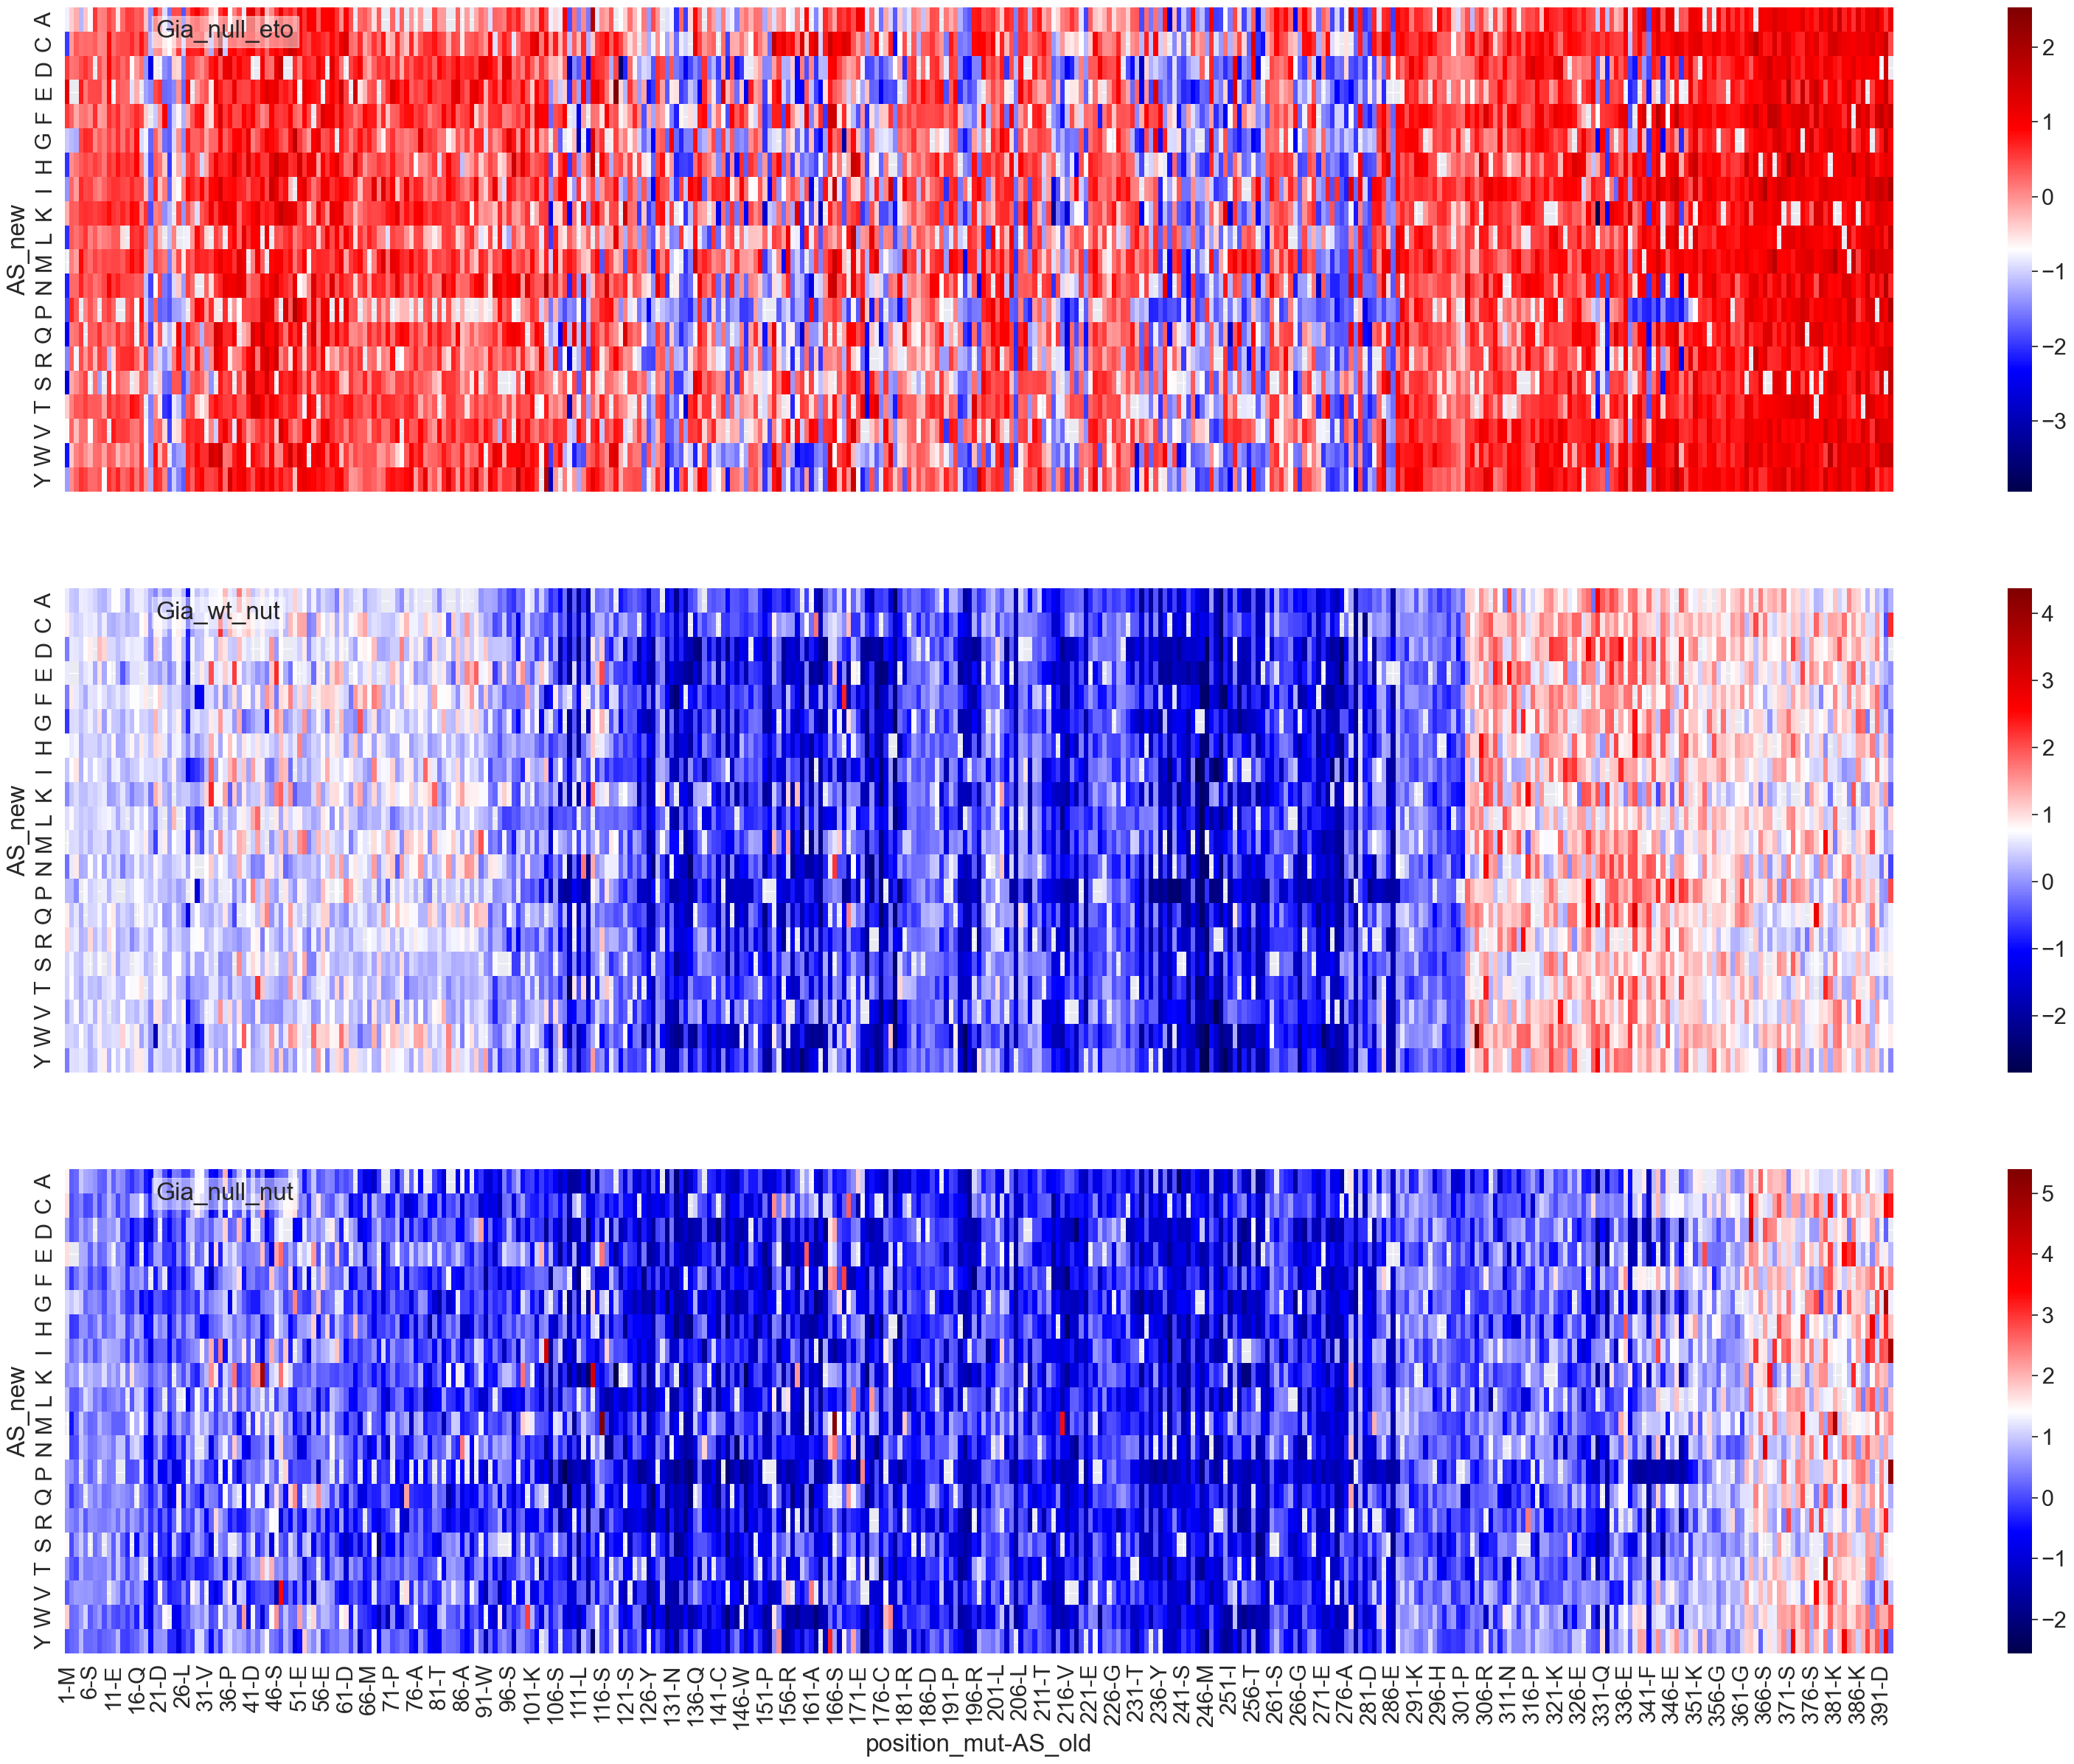

In [38]:
mult_hmap(gia_null_eto, gia_wt_nut, gia_null_nut)